In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
our_color_palette = {"WT": "#F2C14E", # yellow
                     "W": "#F2C14E", # yellow
                     "IP": "#79ADDC", # blue
                     "I": "#79ADDC", # blue
                     "KO": "#B279A7", # purple
                     "K": "#B279A7", # purple
                    } 
treatments_list = ["W", "I", "K"]
passages_list = ["p1", "p2", "p3", "p5", "p10"]
replicates_list = ['a', 'b', 'c']

In [17]:
# define protein 

proteins = {'DCV' : {
    "1A": (799, 1089),
    "2A": (1092, 1161),
    "2B": (1164, 1587),
    "2C": (1590, 2901),
    "3A": (2904, 3501),
    "3C": (3504, 4422),
    "RdRp": (4425, 6072),
    "VP2": (6267, 7110),
    "VP4": (7113, 7281),
    "VP3": (7284, 8175),
    "VP1": (8175, 8970),
}, 
            'CrPV': {
    "1A": (709, 1206),
    "2A": (1207, 1278),
    "2B": (1279, 1692),
    "2C": (1693, 2925),
    "3A": (2926, 3361),
    "3B": (3364, 3432),
    "3C": (3433, 4368),
    "RdRp": (4369, 6022),
    "VP1": (6217, 7065),
    "VP4": (7066, 7236),
    "VP2": (7237, 8121),
    "VP3": (8122, 8902),
}
           }

In [18]:
length_crpv = 9185
length_coding = 8902 - 709
protein_2B = proteins['CrPV']['2B'][1] - proteins['CrPV']['2B'][0]
protein_2B/length_coding

0.050408885634077874

In [19]:
# load diveristy 

fname = "../../results_summary/all_snpgenie_site_results.csv"
df = pd.read_csv(fname)

In [20]:
proteins_virus.items()

dict_items([('1A', (709, 1206)), ('2A', (1207, 1278)), ('2B', (1279, 1692)), ('2C', (1693, 2925)), ('3A', (2926, 3361)), ('3B', (3364, 3432)), ('3C', (3433, 4368)), ('RdRp', (4369, 6022)), ('VP1', (6217, 7065)), ('VP4', (7066, 7236)), ('VP2', (7237, 8121)), ('VP3', (8122, 8902))])

In [21]:
df_pis_protein = pd.DataFrame() 

for virus in ['CrPV']:
    for sample in df['passage'].unique():
        proteins_virus = proteins[virus]
        for protein in proteins_virus.items():
            protein_id = protein[0]
            if protein_id == '2B':
                protein_start = protein[1][0]
                protein_end = protein[1][1]
                protein_length = protein_end - protein_start

                df_temp = df[df['virus']== virus]
                df_temp = df_temp[df_temp['passage']==sample]
                df_temp = df_temp[df_temp['site'].isin(list(range(protein_start,protein_end+1 )))]
                avg_pi = df_temp['pi'].sum()/protein_length

                mean_pis = {
                            'virus': [virus], 
                            'sample': sample, 
                            'protein': protein_id,
                            'avg_pi': avg_pi, 
                        }
                df_pis_protein = pd.concat([pd.DataFrame(mean_pis),df_pis_protein], ignore_index=True)
                
                df_temp = df[df['virus']== virus]
                df_temp = df_temp[df_temp['passage']==sample]
                pos_list = list(range(protein_start,protein_end+1 ))
                pos_list.remove(1323)
                pos_list.remove(1363)
                df_temp = df_temp[df_temp['site'].isin(pos_list)]
                avg_pi = df_temp['pi'].sum()/protein_length

                mean_pis = {
                            'virus': [virus], 
                            'sample': sample, 
                            'protein': protein_id+"-excl.1363&1323",
                            'avg_pi': avg_pi, 
                        }

                df_pis_protein = pd.concat([pd.DataFrame(mean_pis),df_pis_protein], ignore_index=True)

In [22]:
df_pis_protein['genotype'] = df_pis_protein['sample'].str.split("_").str[0]
df_pis_protein['rep'] = df_pis_protein['sample'].str.split("_").str[-1]
df_pis_protein['passage'] = df_pis_protein['sample'].str.split("_").str[1].str.split("p").str[-1].astype(int)

df_pis_protein.head()

,virus,sample,protein,avg_pi,genotype,rep,passage
0,CrPV,W_p10_c,2B-excl.1363&1323,0.000124,W,c,10
1,CrPV,W_p10_c,2B,0.000372,W,c,10
2,CrPV,W_p5_c,2B-excl.1363&1323,0.000195,W,c,5
3,CrPV,W_p5_c,2B,0.000195,W,c,5
4,CrPV,W_p5_b,2B-excl.1363&1323,0.000227,W,b,5


In [23]:
df_pis_protein['genotype'].unique()

array(['W', 'I', 'K', 'parental'], dtype=object)

In [24]:
df_pis_protein[df_pis_protein['genotype']=='parental']

,virus,sample,protein,avg_pi,genotype,rep,passage
90,CrPV,parental_p0_vs_p0,2B-excl.1363&1323,0.000127,parental,p0,0
91,CrPV,parental_p0_vs_p0,2B,0.000127,parental,p0,0


/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_44284/3580737562.py:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  g = sns.catplot(


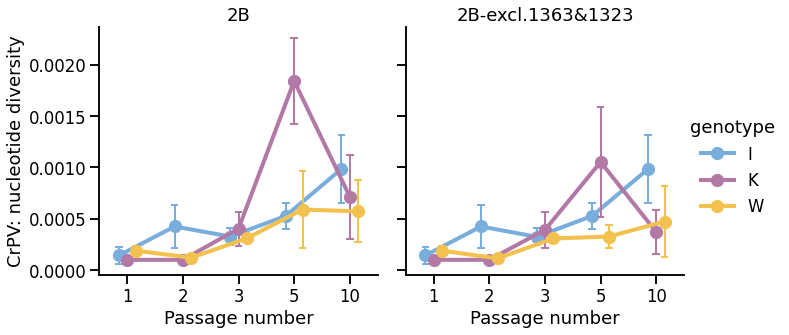

In [26]:
g = sns.catplot(
    data=df_pis_protein[df_pis_protein['genotype'] != 'parental'],
    x='passage',
    y='avg_pi',
    hue='genotype',
    col='protein',
    dodge=0.3,
    errorbar='se',
    errwidth=2, 
    capsize=0.1,
    palette=our_color_palette,
    col_order=["2B", "2B-excl.1363&1323"],
    kind='point'
)

# Remove "protein =" from column titles
g.set_titles(template="{col_name}")

# Change y-axis label
g.set_axis_labels("Passage number", "CrPV: nucleotide diversity")

g.figure.savefig(f"/Users/lfuhrmann/Downloads/2b_diveristy.pdf")

In [37]:
df_t = df_pis_protein[df_pis_protein['genotype'] != 'parental']

In [42]:
df_t[(df_t['protein']=="2B") & (df_t['passage']==5)]['avg_pi'].mean()

0.0009859272872169223

In [43]:
df_t[(df_t['protein']=="2B-excl.1363&1323") & (df_t['passage']==5)]['avg_pi'].mean()

0.0006351283777740804

In [44]:
df_t[(df_t['protein']=="2B") & (df_t['passage']==10)]['avg_pi'].mean()

0.0007571930384539652

In [45]:
df_t[(df_t['protein']=="2B-excl.1363&1323") & (df_t['passage']==10)]['avg_pi'].mean()

0.0006088934974889853